# Regression analysis of Gapminder data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import re
from urllib.request import urlopen, Request
from matplotlib.colors import ListedColormap
from pandas.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Scrapping data from the github page
hdr = {'User-Agent': 'Safari/13.1'}
r = requests.get("https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv", headers=hdr)
soup = BeautifulSoup(r.content, 'html')
data = soup.find("table", { "js-csv-data csv-data js-file-line-container" })
df = pd.read_html(str(data))[0]
df = df.drop(labels= 'Unnamed: 0', axis=1)
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### Exercise 1

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

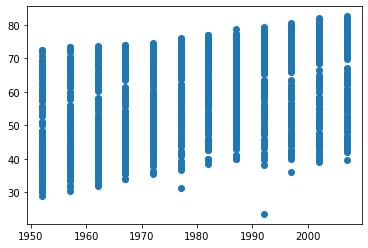

In [83]:
plt.scatter(x = df["year"], y = df["lifeExp"])
plt

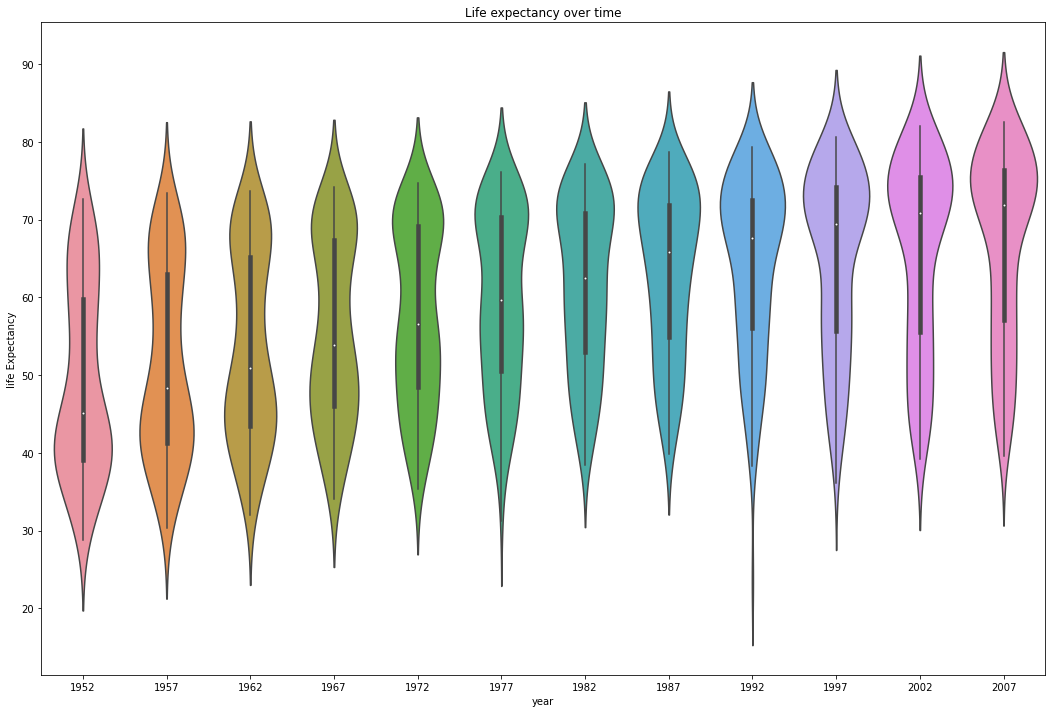

In [84]:
# Displaying the violin plot of the scatter plot

violin_plot = sns.violinplot(x = df.year, y = df.lifeExp)

coord = violin_plot.get_position()
violin_plot.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
violin_plot.set_title("Life expectancy over time")
violin_plot.set(ylabel = "life Expectancy")
violin_plot

### Question 1

Life expectancy seems to be increasing linearly over time.

### Question 2

Based on the violin plot, the life expectancy seems to be skewed across countries for individual years. The plots from 1952 to 1967 have a right skew. The plots from 1972 to 2007 have a left skew. The plots are mostly unimodal, with the exception of possibly 1967. None of the plots are symmetric around it's center.

### Question 3

It depends on the alpha level. If the alpha level is low then it is possible that the calculated p-value will be greater and thus we will fail to reject the null hypothesis. However, given that it is around 0.05, I do believe that it is possible to reject the null hypothesis and claim that there is a relationship between life expectancy vs. year.

### Question 4 

Given that a residual plot of a truly linear model looks like a random scatter plot with a line of best fit at y = 0, I would expect the violin plot of residuals to be fairly uniform and look like rectangles chopped in half by y = 0.The x-axis would have the same years as the original plot but the y-axis range from (the lowest value on the original plot plot - linear regression equation) to the highest value on the original plot plot - linear regression equation). 

### Question 5 

Given that the assumption of linear regression is that the relationships between variables is linear, there should be no visible pattern in the residual plot. Every violin plot will be centered at y = 0 but the violin plots that correspond to years with a greater range of years will also be longer on the residual plot. 

### Exercise 2

In [85]:
year = df["year"][:, np.newaxis] # Input must be a 2D-array
lifeExp = df["lifeExp"]
lin_reg = LinearRegression()
lin_reg.fit(year,lifeExp)
print("y = " + str(lin_reg.coef_[0]) + "x + " + str(lin_reg.intercept_))
print("m = " + str(lin_reg.coef_[0]))
print("b = " + str(lin_reg.intercept_))

y = 0.32590382763715164x + -585.6521874415445
m = 0.32590382763715164
b = -585.6521874415445


### Question 6 

On average, life expectancy increases 0.32590382763715164 years every year around the world.

### Question 7

In [86]:
sm.OLS(lifeExp.values, year).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          3.743e+04
Date:                Wed, 11 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:42:44   Log-Likelihood:                         -6748.2
No. Observations:                1704   AIC:                                  1.350e+04
Df Residuals:                    1703   BIC:                                  1.350e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0301      0.000    193.471      0.000       0.030       0.030
==============================================================================
Omnibus:                      963.786   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.361
Skew:                          -0.257   Prob(JB):                     2.42e-25
Kurtosis:                       1.846   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
ols(formula='lifeExp ~ year', data=df).fit().f_pvalue

7.546794625596163e-80

The null hypothesis can be rejected because the p-value 7.546794625596163e-80 is less than 0.05.

### Exercise 3

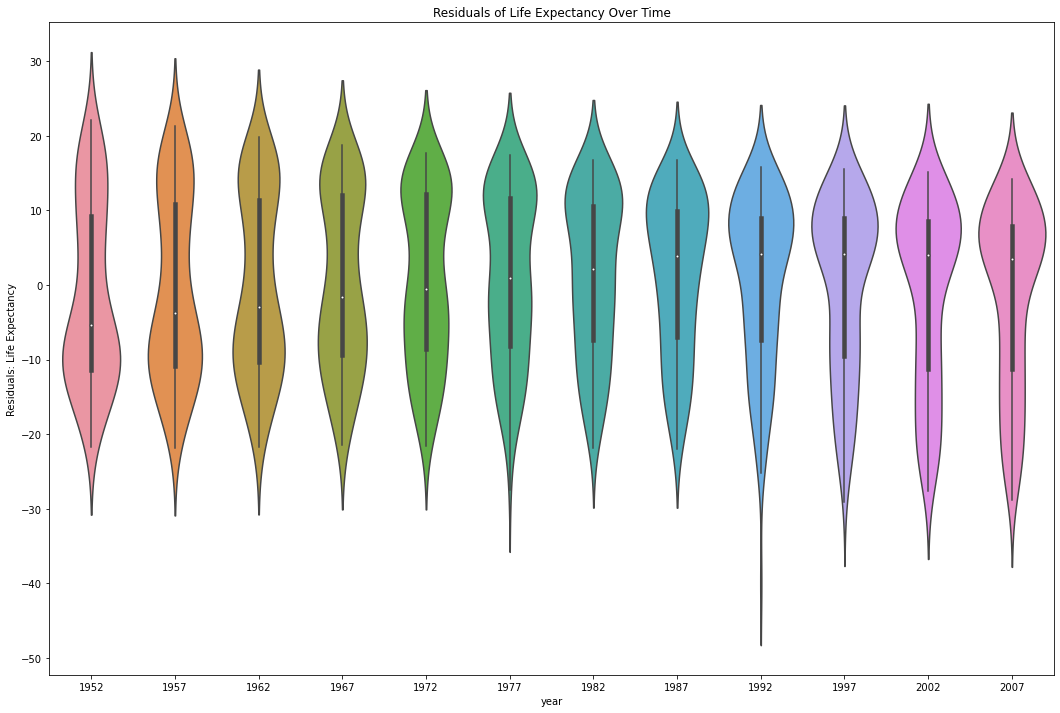

In [88]:
# Find the residuals 
residuals = df["lifeExp"].copy() 
for i in range (0,len(residuals)):
    residuals[i] = residuals[i] - lin_reg.predict([year[i]])

# Create the violin plot
violin_plot2 = sns.violinplot(x = df.year, y = residuals)
coord = violin_plot2.get_position()
violin_plot2.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
violin_plot2.set_title("Residuals of Life Expectancy Over Time")
violin_plot2.set(ylabel = "Residuals: Life Expectancy")
violin_plot2 

### Question 8

The violin plot does match my expectations in regards to its distribution. I was wrong about the shape as it still looks like a violin instead of a rectangle.

### Exercise 4

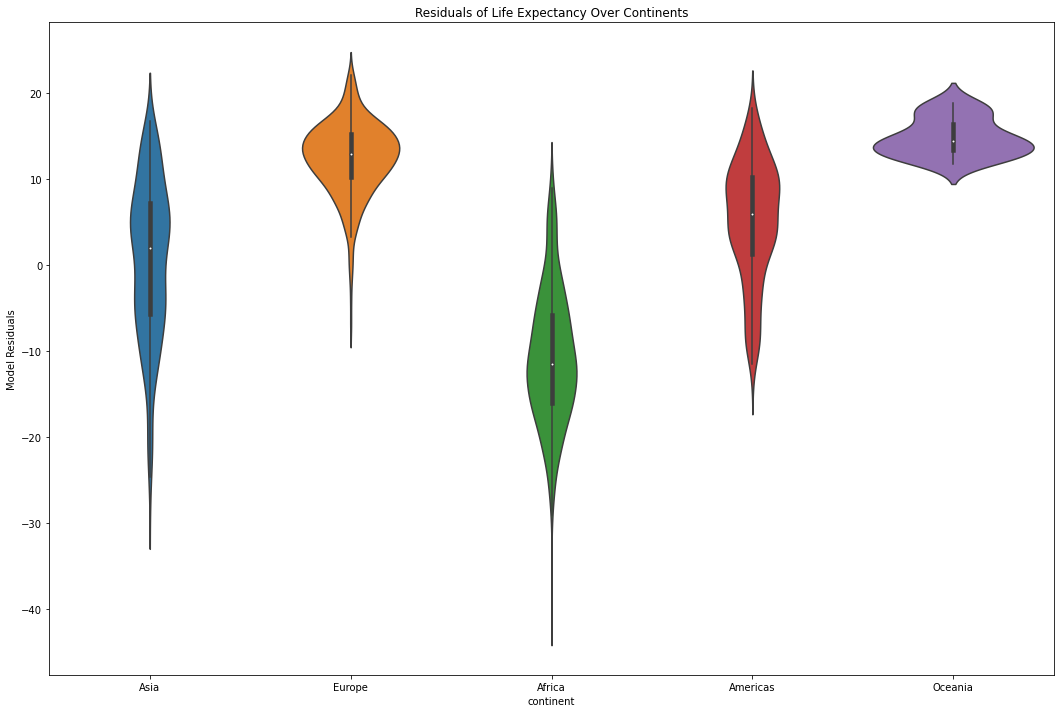

In [89]:
violin_plot3 = sns.violinplot(x = df.continent, y = residuals)
coord = violin_plot3.get_position()
violin_plot3.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
violin_plot3.set_title("Residuals of Life Expectancy Over Continents")
violin_plot3.set(ylabel = "Model Residuals")
violin_plot3 

### Question 9

There is a dependence between model residual and continent since they all have different distributions. Asia and Africa have a very wide range with while Europe and Oceania have a low range. Asia and America both have a mean between 0 to 10 and Europ and Oceania both have a mean between 10 to 20. This suggests that it is better to do seperate regression analyses on the different continents to create a more accurate model.

### Exercise 5

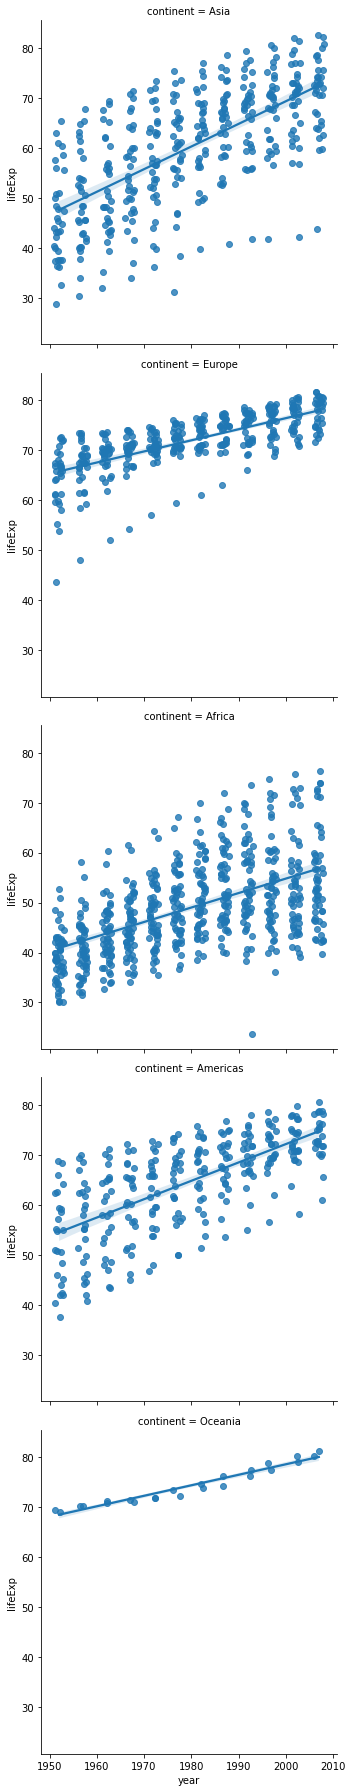

In [100]:
continent_lifeExp = sns.lmplot(x='year', y='lifeExp', col='continent', data=df, col_wrap=1, x_jitter=1)
continent_lifeExp

### Question 10

Every continent has a different slope, start point, and end point. Even though the slopes of Africa and America are very similar, America's life expectancy starts at around 50 in the 1950s while Africa's ends at around 50 in the 2010s. Even though Europ and Oceania may look very similar, they are still slightly different from each other. Thus, based on these plots, there should be an interaction term between continent and years.

### Exercise 6 

In [91]:
ols(formula='lifeExp ~ year + continent + year*continent', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:42:47   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

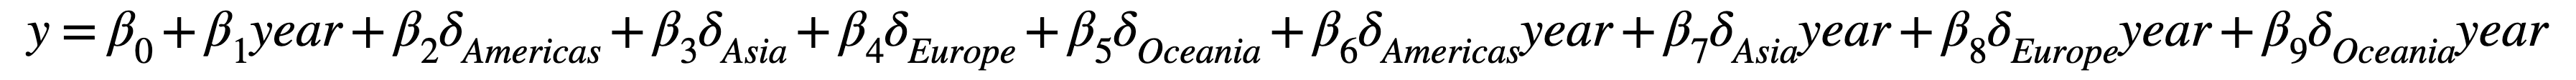

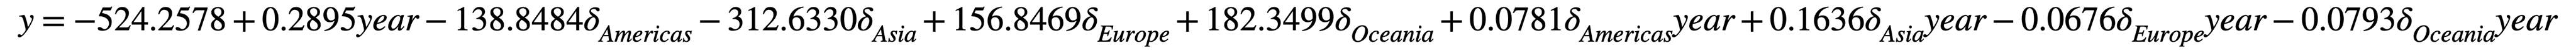

In the case above, Africa was the base model. Once we fit a multi-regression model, we get a total of 5 intercepts and 5 coefficients. The intercept is the intercept or the bias term of Africa and then the different intercepts for the different continents are given below it followed by a row called the coefficient which is again the coefficient of Africa, followed by the coefficients of the other continents. Essentially it's fitting a different regression model for every continent and hence every continent will have its own coefficient and intercept. 

### Question 11

Not all of the parameters in the model are very close to 0. The coefficients for the single variables (just year and the 4 continents) range from -312.6330 to 182.3499. The coefficients for the double variables (continet*year) are close to 0.

### Question 12

In [96]:
africa = df[df["continent"] == "Africa"]
americas = df[df["continent"] == "Americas"]
asia = df[df["continent"] == "Asia"]
europe = df[df["continent"] == "Europe"]
oceania = df[df["continent"] == "Oceania"]

# Finding the formula for the Africa Model
africaX = africa["year"][:, np.newaxis] 
africaY = africa["lifeExp"]
africareg = LinearRegression()
africareg.fit(africaX,africaY)

# Finding the formula for the Americas Model
americasX = americas["year"][:, np.newaxis] 
americasY = americas["lifeExp"]
americasreg = LinearRegression()
americasreg.fit(americasX,americasY)

# Finding the formula for the Asia Model
asiaX = asia["year"][:, np.newaxis] 
asiaY = asia["lifeExp"]
asiareg = LinearRegression()
asiareg.fit(asiaX,asiaY)

# Finding the formula for the Europe Model
europeX = europe["year"][:, np.newaxis] 
europeY = europe["lifeExp"]
europereg = LinearRegression()
europereg.fit(europeX,europeY)

# Finding the formula for the Oceania Model
oceaniaX = oceania["year"][:, np.newaxis] 
oceaniaY = oceania["lifeExp"]
oceaniareg = LinearRegression()
oceaniareg.fit(oceaniaX,oceaniaY)

print("Average increases in life expectancy per year:")
print("Africa: " + str(africareg.coef_[0]))
print("Americas: " + str(americasreg.coef_[0]))
print("Asia: " + str(asiareg.coef_[0]))
print("Europe: " + str(europereg.coef_[0]))
print("Oceania: " + str(oceaniareg.coef_[0]))

Average increases in life expectancy per year:
Africa: 0.2895292630446477
Americas: 0.3676509370629371
Asia: 0.4531224038991313
Europe: 0.2219321445221446
Oceania: 0.21027237762237763


### Exercise 7

In [97]:
# F-statistic value of the year-only model
ols(formula='lifeExp ~ year', data=df).fit().fvalue 

398.6047457117627

In [98]:
# F-statistic value of the interactive model
ols(formula='lifeExp ~ year + continent + year*continent', data=df).fit().fvalue

424.27290234006927

### Question 13

The interactive model is significantly better than the year-only model since it has a higher F-statistic value by 25.6681566283 (424.27290234006927 > 398.6047457117627). 

### Exercise 8

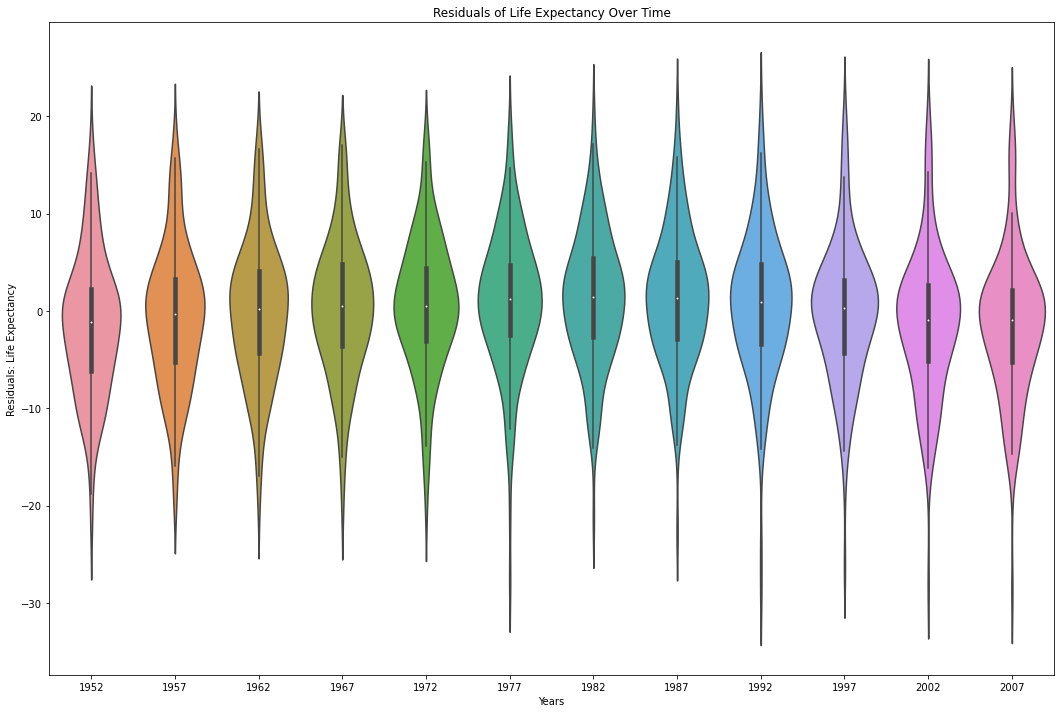

In [99]:
# Finding the residuals
Residuals2 = []
continent = df["continent"]
Merged = [(year[i], lifeExp[i], continent[i]) for i in range(0, len(year))]
for (year_num,age,continent) in conMerged:
    if continent == "Africa":
        value = africareg.predict([year_num])
    elif continent == "Americas":
        value = americasreg.predict([year_num])
    elif continent == "Asia":
        value = asiareg.predict([year_num])
    elif continent == "Europe":
        value = europereg.predict([year_num])
    elif continent == "Oceania":
        value = oceaniareg.predict([year_num])
    Residuals2.append(age - value[0])

# Creating the violin plot
ini_array1 = np.array(year) 
year_flattened = ini_array1.flatten() 
df2 = pd.DataFrame({'Years':year_flattened,'Residuals':conResiduals})
violin_plot3 = sns.violinplot(x = "Years", y = "Residuals", data = df2)
coord = violin_plot3.get_position()
violin_plot3.set_position([coord.x0, coord.y0, coord.width * 3, coord.height * 3])
violin_plot3.set_title("Residuals of Life Expectancy Over Time")
violin_plot3.set(ylabel = "Residuals: Life Expectancy")
violin_plot3 